<a href="https://colab.research.google.com/github/jolied-14/MLE-F2025/blob/main/MLE_Class6Participation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

# importing csv
try:
    df = pd.read_csv('/content/SNCurveData.csv')
    display(df.head())
except FileNotFoundError:
    print("Error: 'SNCurveData.csv' not found. Please replace with the correct file path.")

,x,y
0,26656.679958,80.390455
1,33310.430952,80.390455
2,38645.290592,80.563989
3,47579.400000,80.390455
4,56864.119121,80.563989


In [34]:
# features
X = df.to_numpy()
print(X)

[[2.66566800e+04 8.03904555e+01]
 [3.33104310e+04 8.03904555e+01]
 [3.86452906e+04 8.05639886e+01]
 [4.75794000e+04 8.03904555e+01]
 [5.68641191e+04 8.05639886e+01]
 [6.59712392e+04 8.05639886e+01]
 [7.76823199e+04 8.05639886e+01]
 [1.03015608e+05 8.03904555e+01]
 [3.58788417e+04 7.01518425e+01]
 [4.90142414e+04 7.03253835e+01]
 [5.85789976e+04 7.01518425e+01]
 [7.42963277e+04 7.01518425e+01]
 [8.74853803e+04 7.01518425e+01]
 [1.10958582e+05 7.01518425e+01]
 [1.34595971e+05 7.01518425e+01]
 [2.74605658e+05 7.01518425e+01]
 [1.75857580e+05 6.99783094e+01]
 [4.16250190e+04 5.97396963e+01]
 [5.20150043e+04 6.00867705e+01]
 [7.42963277e+04 6.00867705e+01]
 [8.87946302e+04 6.00867705e+01]
 [1.04557415e+05 6.00867705e+01]
 [1.21302730e+05 6.00867705e+01]
 [1.51581000e+05 6.00867705e+01]
 [1.73264378e+05 6.00867705e+01]
 [2.04022197e+05 6.00867705e+01]
 [2.62636234e+05 6.00867705e+01]
 [3.33104612e+05 6.00867705e+01]
 [5.35836213e+05 5.99132374e+01]
 [1.01496628e+06 5.99132374e+01]
 [8.002502

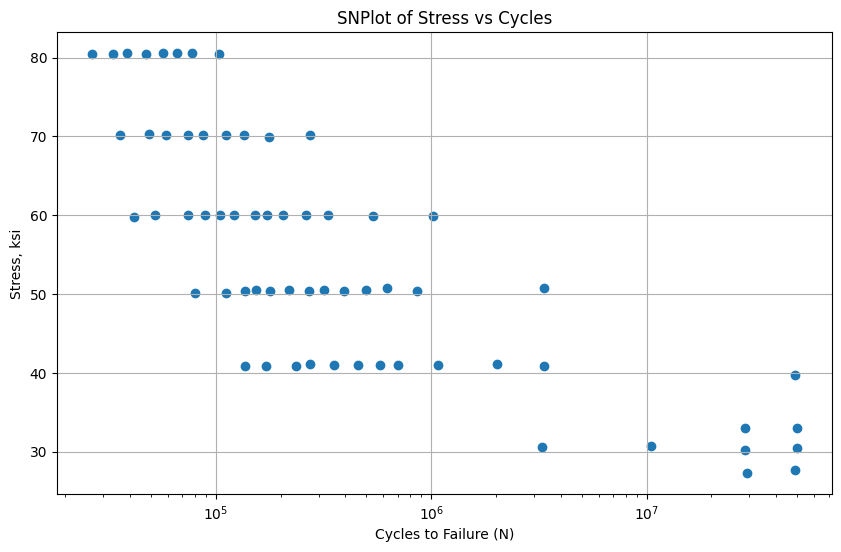

In [35]:
import matplotlib.pyplot as plt

# create plot
plt.figure(figsize=(10, 6))
plt.scatter(df['x'], df[' y'])
plt.xlabel('Cycles to Failure (N)')
plt.ylabel('Stress, ksi')
plt.title('SNPlot of Stress vs Cycles')
plt.xscale('log')
plt.grid(True)
plt.show()

In [36]:
# Tag the data points
df['sample_type'] = 0
df.loc[df['x'] > 10**7, 'sample_type'] = 1
display(df)

,x,y,sample_type
0,2.665668e+04,80.390455,0
1,3.331043e+04,80.390455,0
2,3.864529e+04,80.563989,0
3,4.757940e+04,80.390455,0
4,5.686412e+04,80.563989,0
...,...,...,...
58,4.974779e+07,33.015191,1
59,4.974779e+07,30.412154,1
60,4.901427e+07,27.635584,1
61,2.914176e+07,27.288510,1


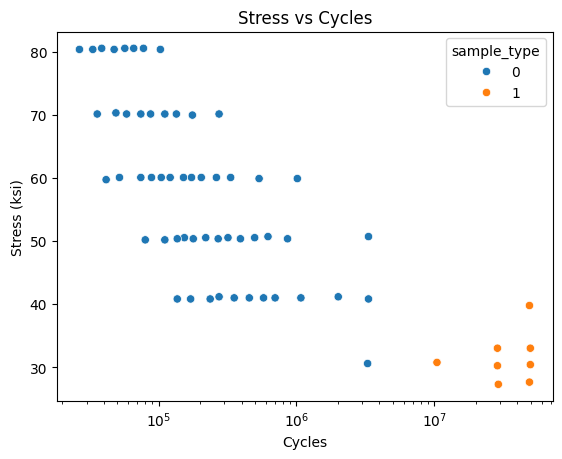

In [37]:
sns.scatterplot(data=df, x='x', y=' y', hue='sample_type')
plt.xlabel("Cycles")
plt.xscale('log')
plt.ylabel("Stress (ksi)")
plt.title("Stress vs Cycles")
plt.show()

In [38]:
X = df[["x"," y"]].to_numpy()
print(X)

[[2.66566800e+04 8.03904555e+01]
 [3.33104310e+04 8.03904555e+01]
 [3.86452906e+04 8.05639886e+01]
 [4.75794000e+04 8.03904555e+01]
 [5.68641191e+04 8.05639886e+01]
 [6.59712392e+04 8.05639886e+01]
 [7.76823199e+04 8.05639886e+01]
 [1.03015608e+05 8.03904555e+01]
 [3.58788417e+04 7.01518425e+01]
 [4.90142414e+04 7.03253835e+01]
 [5.85789976e+04 7.01518425e+01]
 [7.42963277e+04 7.01518425e+01]
 [8.74853803e+04 7.01518425e+01]
 [1.10958582e+05 7.01518425e+01]
 [1.34595971e+05 7.01518425e+01]
 [2.74605658e+05 7.01518425e+01]
 [1.75857580e+05 6.99783094e+01]
 [4.16250190e+04 5.97396963e+01]
 [5.20150043e+04 6.00867705e+01]
 [7.42963277e+04 6.00867705e+01]
 [8.87946302e+04 6.00867705e+01]
 [1.04557415e+05 6.00867705e+01]
 [1.21302730e+05 6.00867705e+01]
 [1.51581000e+05 6.00867705e+01]
 [1.73264378e+05 6.00867705e+01]
 [2.04022197e+05 6.00867705e+01]
 [2.62636234e+05 6.00867705e+01]
 [3.33104612e+05 6.00867705e+01]
 [5.35836213e+05 5.99132374e+01]
 [1.01496628e+06 5.99132374e+01]
 [8.002502

In [39]:
y_target = df['sample_type'].to_numpy()
print(y_target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1]


In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_target, test_size=0.5, random_state=42, stratify=y_target)

In [41]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [42]:
knn.score(X_test,y_test)
print(knn.score(X_test,y_test))
knn.predict(X_test)
print(knn.predict(X_test))


1.0
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0]


In [43]:
cn=confusion_matrix(y_test,knn.predict(X_test))
print(cn)

[[28  0]
 [ 0  4]]


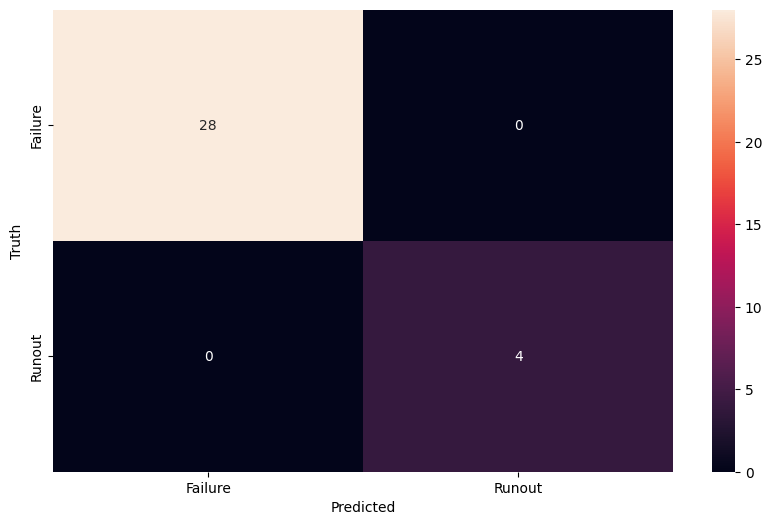

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       1.00      1.00      1.00         4

    accuracy                           1.00        32
   macro avg       1.00      1.00      1.00        32
weighted avg       1.00      1.00      1.00        32



In [46]:
plt.figure(figsize=(10,6))
sns.heatmap(cn,annot=True,xticklabels=["Failure", "Runout"], yticklabels=["Failure", "Runout"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print(classification_report(y_test,knn.predict(X_test)))